In [1]:
import matplotlib.pyplot as plt

In [29]:
import numpy as np
import random
import sys
import os

TIME_SLOTS = 1
GAMMA = 0.90

class env_network:
    def __init__(self,num_systems,num_channels,attempt_prob):
        self.ATTEMPT_PROB = attempt_prob
        self.NUM_SYSTEMS = num_systems
        self.NUM_CHANNELS = num_channels
        self.REWARD = 1
        self.action_space = np.arange(self.NUM_CHANNELS+1)
        self.systems_action = np.zeros([self.NUM_SYSTEMS],np.int32) 
        self.systems_observation = np.zeros([self.NUM_SYSTEMS],np.int32)

    def sample(self):
        #从[0,space)中选择系统个数的随机数
        x =  np.random.choice(self.action_space,size=self.NUM_SYSTEMS)
        return x
    def step(self,action): 
        assert (action.size) == self.NUM_SYSTEMS, "行为和系统数目的维度应该相同"
        channel_alloc_frequency = np.zeros([self.NUM_CHANNELS + 1],np.int32)  #0 for no chnnel access
        obs = []
        reward = np.zeros([self.NUM_SYSTEMS])
        
        #对于每个系统的action而言，这里是随机的，而且互相没法通信
        #所以用随机的方法将每个系统的action分配好
        j = 0
        for  each in action:
            prob = random.uniform(0,1)
            if prob <= self.ATTEMPT_PROB:
                self.systems_action[j] = each  
                channel_alloc_frequency[each]+=1
            j+=1
        
        #要么为0，要么为1
        for i in range(1,len(channel_alloc_frequency)):
            if channel_alloc_frequency[i] > 1:
                channel_alloc_frequency[i] = 0
        #信道分配频率
        for i in range(len(action)):
            self.systems_observation[i] = channel_alloc_frequency[self.systems_action[i]]
            if self.systems_action[i] ==0:   #未接入信道
                self.systems_observation[i] = 0
            if self.systems_observation[i] == 1:
                reward[i] = 1
            obs.append((self.systems_observation[i],reward[i]))
        
        #信道容量为1 ，obs数组存入剩下的信道容量
        residual_channel_capacity = channel_alloc_frequency[1:]
        residual_channel_capacity = 1-residual_channel_capacity
        obs.append(residual_channel_capacity)
        return obs

In [38]:
NUM_SYSTEMS = 6
NUM_CHANNELS = 5
ATTEMPT_PROB = 1
env = env_network(NUM_SYSTEMS,NUM_CHANNELS,ATTEMPT_PROB)
action = env.sample()
print (action)
obs = env.step(action)
print(obs)

[5 0 2 5 0 0]
[(0, 0.0), (0, 0.0), (1, 1.0), (0, 0.0), (0, 0.0), (0, 0.0), array([1, 0, 1, 1, 1])]


In [34]:
action = np.array([1,2,3,1,2,3])
obs = env.step(action)
print(obs)

[4 2 3 2 3 0]


[(1, 1.0), (0, 0.0), (0, 0.0), (0, 0.0), (0, 0.0), (0, 0.0), array([1, 1, 1, 0, 1])]


[(1, 1.0), (1, 1.0), (0, 0.0), (1, 1.0), (0, 0.0), (1, 1.0), array([0, 0, 0, 1, 1])]


[4 5 3 2 3 2]
[(1, 1.0), (1, 1.0), (0, 0.0), (0, 0.0), (0, 0.0), (0, 0.0), array([1, 1, 1, 0, 0])]
2.0
***************
[2 1 1 3 3 3]
[(1, 1.0), (0, 0.0), (0, 0.0), (0, 0.0), (0, 0.0), (0, 0.0), array([1, 0, 1, 1, 1])]
1.0
***************
[5 0 4 4 4 5]
[(0, 0.0), (0, 0.0), (0, 0.0), (0, 0.0), (0, 0.0), (0, 0.0), array([1, 1, 1, 1, 1])]
0.0
***************
[3 2 0 3 1 5]
[(0, 0.0), (1, 1.0), (0, 0.0), (0, 0.0), (1, 1.0), (1, 1.0), array([0, 0, 1, 1, 0])]
3.0
***************
[5 3 0 4 2 3]
[(1, 1.0), (0, 0.0), (0, 0.0), (1, 1.0), (1, 1.0), (0, 0.0), array([1, 0, 1, 0, 0])]
3.0
***************


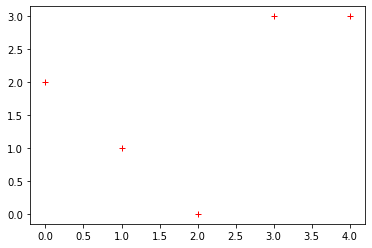

In [37]:
TIME_SLOTS = 5
total_rewards = []
for i in range(TIME_SLOTS):
    action = env.sample()
    print (action)
    obs = env.step(action)
    print (obs)
    rewards = [i[1] for i in obs[:NUM_SYSTEMS]]
    reward_sum = np.sum(rewards)
    print (reward_sum)
    total_rewards.append(reward_sum)
    print ("***************")
plt.plot(np.arange(TIME_SLOTS), total_rewards,'r+')
plt.show()

In [ ]:
plt.plot(np.arange(TIME_SLOTS), total_rewards,'r+')
plt.show()

In [20]:
TIME_SLOTS = 50
total_rewards = []
for i in range(TIME_SLOTS):
    action = env.sample()
    obs = env.step(action)
    rewards = [i[1] for i in obs[:NUM_SYSTEMS]]
    reward_sum = np.sum(rewards)
    total_rewards.append(reward_sum)

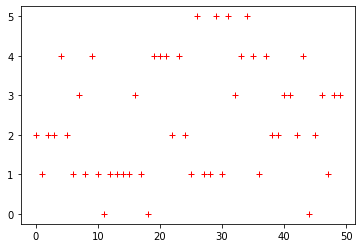

In [21]:
plt.plot(np.arange(TIME_SLOTS), total_rewards,'r+')
plt.show()